In [1]:
# Importar dependências
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp
import logging
import networkx as nx
from importlib import reload
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 3)

# Criando o objeto modelo e variável para indicar a pasta com os dados
data_path = '../../../input/Santos_Basin/Lake_PreSal_Santos_Basin_Well/v7/'
geo_model = gp.create_model('LakePreSal_V7')
cmap_gp = mcolors.ListedColormap(list(geo_model.surfaces.df['color']))

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Inicializando os dados, a extensão e a resolução do modelo.
gp.init_data(geo_model,
             extent=[0, 4000, 0, 12000, -2000, 300],
             resolution=[200, 200, 200],
             path_i=data_path + "surfaces_points_2.csv",
             path_o=data_path + "orientations_points2.csv")

Active grids: ['regular']


LakePreSal_V7  2023-07-12 13:23

In [3]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(geo_model,                         
                         {"ARIRI_UBV_Series": ('ARIRI'),
                          "Unco_Series": ('BARRA_VELHA', 'ITAPEMA'),
                          "Basement_series": ('basement')})


,surface,series,order_surfaces,color,id
0,ARIRI,ARIRI_UBV_Series,1,#015482,1
1,BARRA_VELHA,Unco_Series,1,#9f0052,2
2,ITAPEMA,Unco_Series,2,#ffbe00,3
3,basement,Basement_series,1,#728f02,4


In [4]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                      values
range             12856.516
$C_o$            3935476.19
drift equations   [3, 3, 3]
Wall time: 20.4 s


In [5]:
gp.compute_model(geo_model)
from copy import deepcopy
surface_points_init = deepcopy(geo_model.surface_points.df)
orientations_init = deepcopy(geo_model.orientations.df)

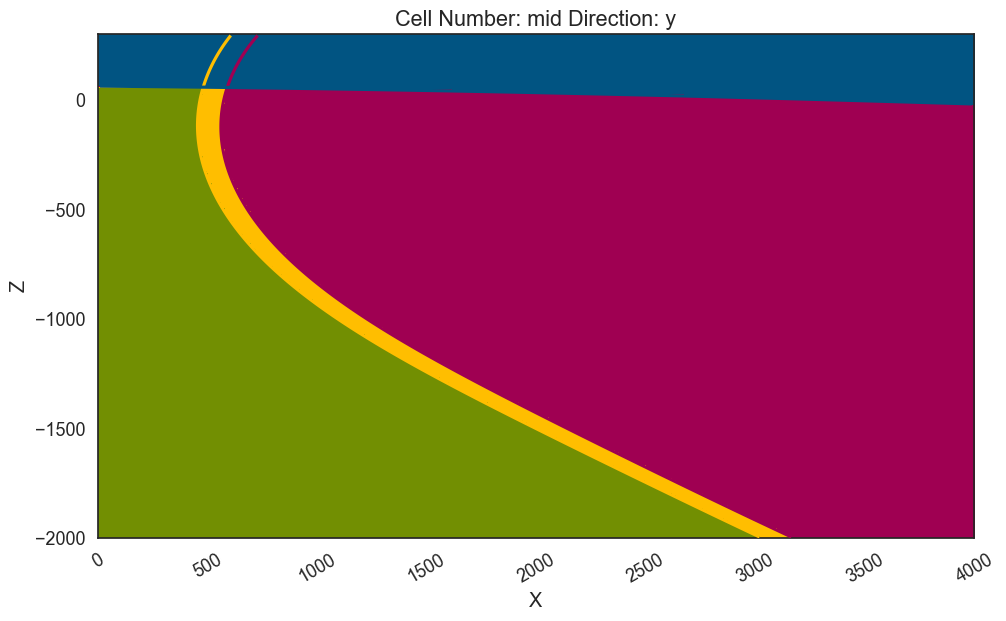

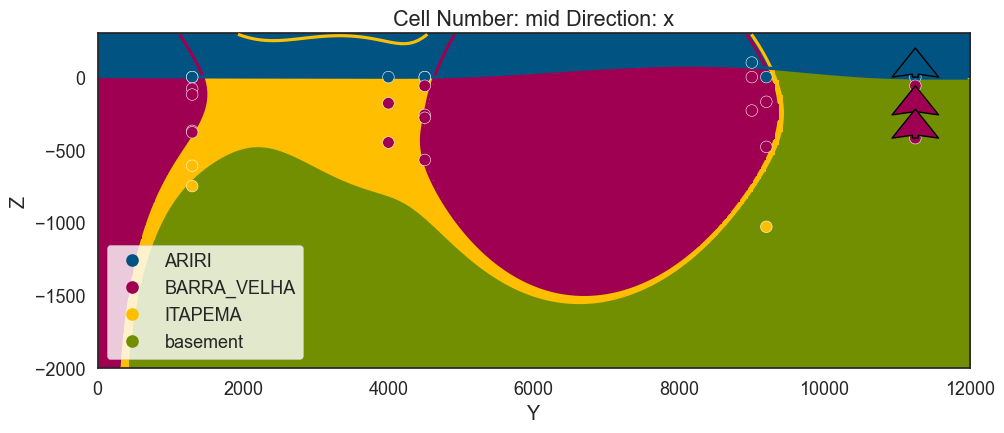

In [6]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True, ve=1)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=2, legend=True)

In [7]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=False)

In [8]:
topo_init = tp.compute_topology(
    geo_model, 
    direction="x",
    voxel_threshold=1
)  #, direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 
    1, 
    topo_init[0], 
    topo_init[1]
)

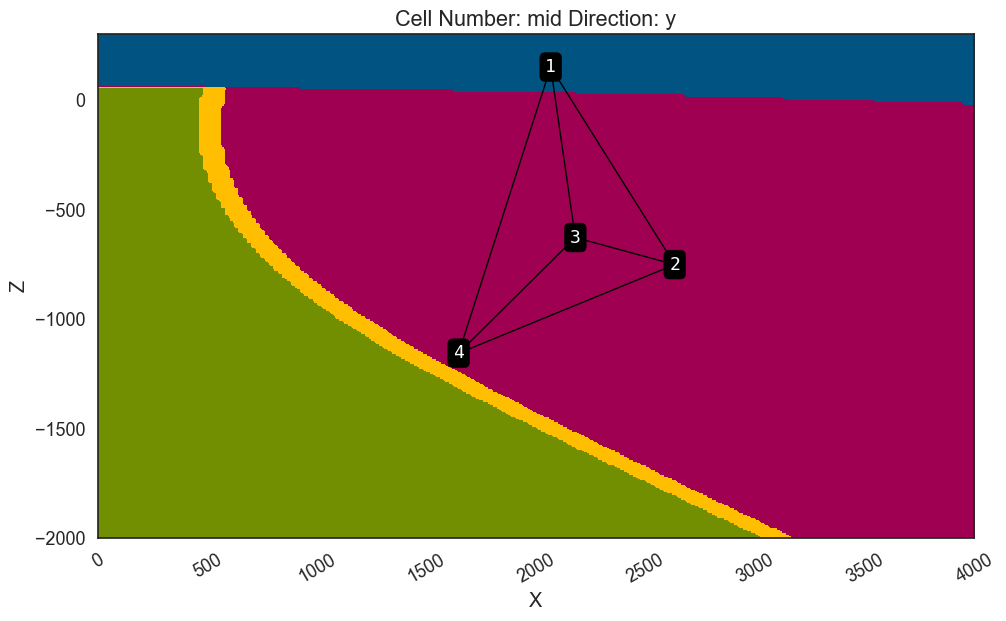

In [9]:
gp.plot_2d(geo_model, direction="y", legend=True, show_data=False, show_boundaries=False)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

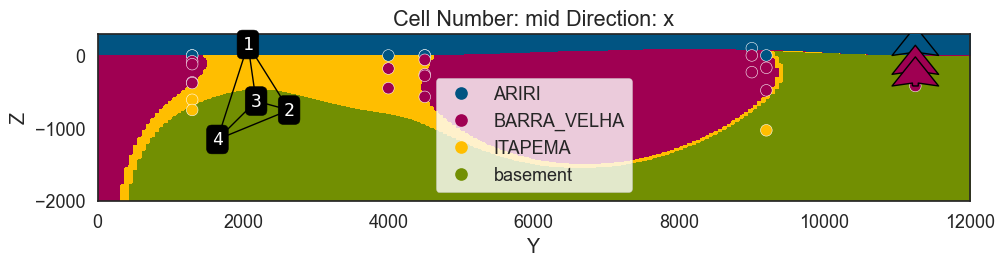

In [10]:
gp.plot_2d(geo_model, direction="x", legend=True, show_data=True, show_boundaries=False)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)